# seaborn-data 全数据集探索

数据来源：从 GitHub 拉取的 [seaborn-data](https://github.com/mwaskom/seaborn-data)，seaborn 官方维护的示例数据集合。

仓库里的 `process/` 文件夹存放的是数据预处理脚本（.py），负责把 `raw/` 里的原始数据清洗加工成最终的 CSV。

本 notebook 逐个探索仓库中的所有数据集。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# ========== Nature 风格 ==========
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['SimHei'],
    'font.size': 8, 'axes.titlesize': 9, 'axes.titleweight': 'bold',
    'axes.labelsize': 8, 'xtick.labelsize': 7, 'ytick.labelsize': 7,
    'legend.fontsize': 7,
    'axes.linewidth': 0.6, 'xtick.major.width': 0.6, 'ytick.major.width': 0.6,
    'xtick.major.size': 3, 'ytick.major.size': 3,
    'axes.spines.top': False, 'axes.spines.right': False,
    'axes.unicode_minus': False,
    'figure.dpi': 150, 'savefig.dpi': 300,
    'figure.facecolor': 'white', 'axes.facecolor': 'white',
    'axes.edgecolor': '#333', 'text.color': '#333',
    'axes.labelcolor': '#333', 'xtick.color': '#333', 'ytick.color': '#333',
})

C = ['#0C5DA5', '#E03A3E', '#00B945', '#FF9500', '#845B97', '#7C7C7C']
sns.set_palette(C)
DATA = Path('seaborn-data')
print('ready')

ready


---
## 1. Titanic — 泰坦尼克号乘客（891 条）

1912 年沉船事件中乘客的年龄、性别、船票等级、票价及是否生还。经典二分类问题。

Jupyter 好处之一：**DataFrame 直接渲染成 HTML 表格**。

In [3]:
titanic = pd.read_csv(DATA / 'titanic.csv')
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

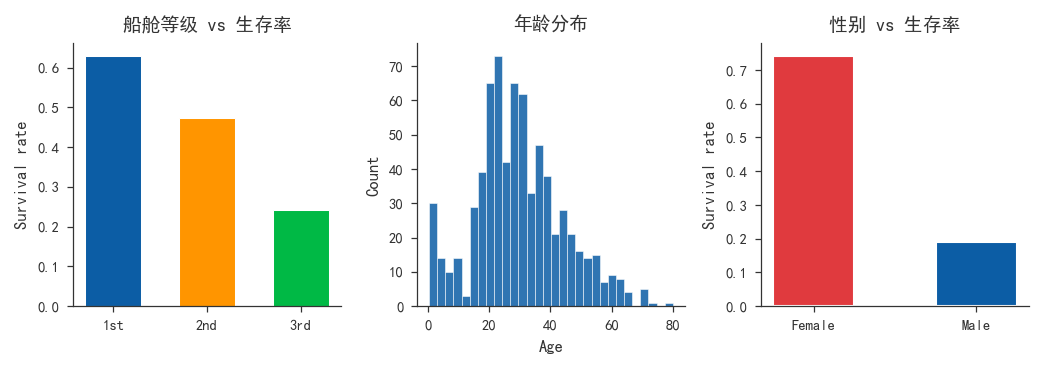

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(7, 2.5))

surv_class = titanic.groupby('pclass')['survived'].mean()
axes[0].bar(surv_class.index, surv_class.values,
            color=[C[0], C[3], C[2]], width=0.6, edgecolor='white', linewidth=0.5)
axes[0].set_title('船舱等级 vs 生存率')
axes[0].set_ylabel('Survival rate')
axes[0].set_xticks([1,2,3]); axes[0].set_xticklabels(['1st','2nd','3rd'])

axes[1].hist(titanic['age'].dropna(), bins=30, color=C[0], edgecolor='white', linewidth=0.3, alpha=0.85)
axes[1].set_title('年龄分布'); axes[1].set_xlabel('Age'); axes[1].set_ylabel('Count')

surv_sex = titanic.groupby('sex')['survived'].mean()
axes[2].bar(['Female','Male'], surv_sex.values, color=[C[1],C[0]], width=0.5, edgecolor='white')
axes[2].set_title('性别 vs 生存率'); axes[2].set_ylabel('Survival rate')

plt.tight_layout(); plt.show()

一等舱、女性生存率远高——"women and children first"。

---
## 2. Tips — 餐厅小费（244 条）

顾客的账单金额、小费、性别、是否吸烟、就餐时间、星期几、人数。

In [5]:
tips = pd.read_csv(DATA / 'tips.csv')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

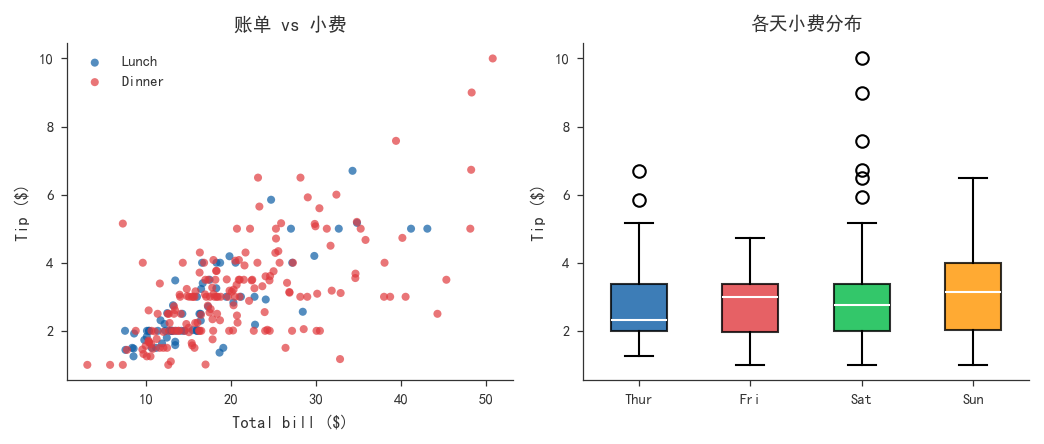

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# 账单 vs 小费
for i, t in enumerate(['Lunch','Dinner']):
    sub = tips[tips['time']==t]
    axes[0].scatter(sub['total_bill'], sub['tip'], c=C[i], s=15, alpha=0.7, label=t, edgecolors='none')
axes[0].set_xlabel('Total bill ($)'); axes[0].set_ylabel('Tip ($)')
axes[0].set_title('账单 vs 小费'); axes[0].legend(frameon=False)

# 各天小费箱线图
days = ['Thur','Fri','Sat','Sun']
bp = axes[1].boxplot([tips[tips['day']==d]['tip'] for d in days],
                      labels=days, patch_artist=True, widths=0.5,
                      medianprops={'color':'white','linewidth':1})
for p, c in zip(bp['boxes'], C[:4]): p.set_facecolor(c); p.set_alpha(0.8)
axes[1].set_ylabel('Tip ($)'); axes[1].set_title('各天小费分布')

plt.tight_layout(); plt.show()

账单越高小费越多，周末小费波动更大。

---
## 3. Penguins — 企鹅体征（344 条）

Palmer 群岛三种企鹅的喙长、喙深、鳍长和体重。Iris 的现代替代。

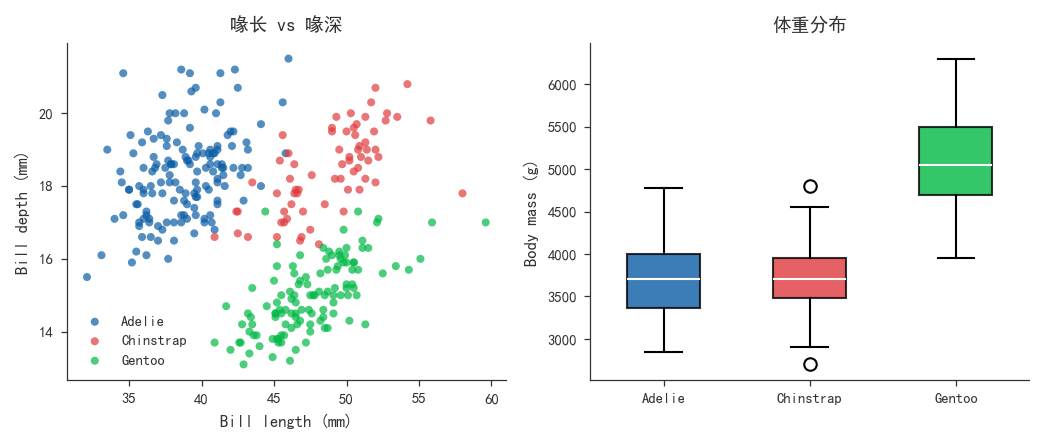

In [7]:
penguins = pd.read_csv(DATA / 'penguins.csv').dropna()

fig, axes = plt.subplots(1, 2, figsize=(7, 3))
for i, sp in enumerate(penguins['species'].unique()):
    sub = penguins[penguins['species']==sp]
    axes[0].scatter(sub['bill_length_mm'], sub['bill_depth_mm'], c=C[i], s=15, alpha=0.7, label=sp, edgecolors='none')
axes[0].set_xlabel('Bill length (mm)'); axes[0].set_ylabel('Bill depth (mm)')
axes[0].set_title('喙长 vs 喙深'); axes[0].legend(frameon=False)

bp = axes[1].boxplot([penguins[penguins['species']==sp]['body_mass_g'] for sp in penguins['species'].unique()],
                      labels=penguins['species'].unique(), patch_artist=True, widths=0.5,
                      medianprops={'color':'white','linewidth':1})
for p, c in zip(bp['boxes'], C[:3]): p.set_facecolor(c); p.set_alpha(0.8)
axes[1].set_ylabel('Body mass (g)'); axes[1].set_title('体重分布')

plt.tight_layout(); plt.show()

三种企鹅的喙形态和体重差异明显，Gentoo 最大。

---
## 4. Iris — 鸢尾花（150 条）

三种鸢尾花的花萼/花瓣尺寸。机器学习入门必备。

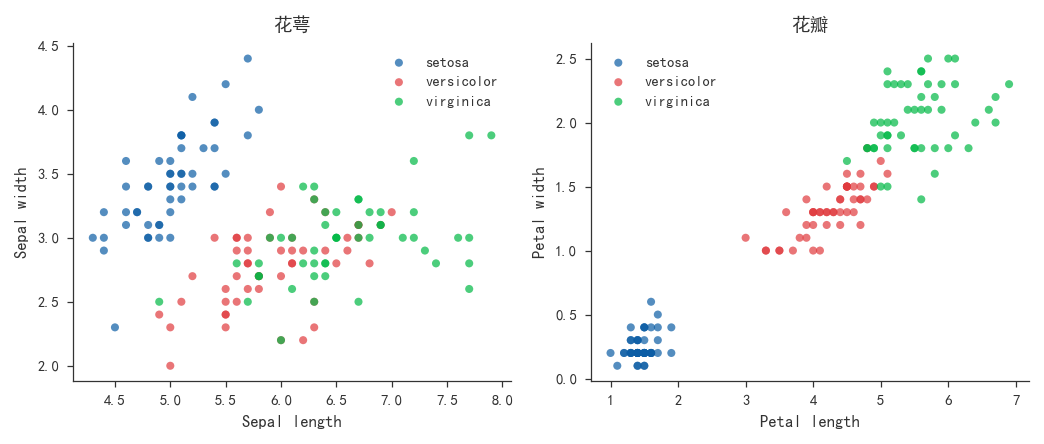

In [8]:
iris = pd.read_csv(DATA / 'iris.csv')

fig, axes = plt.subplots(1, 2, figsize=(7, 3))
for i, sp in enumerate(iris['species'].unique()):
    sub = iris[iris['species']==sp]
    axes[0].scatter(sub['sepal_length'], sub['sepal_width'], c=C[i], s=15, alpha=0.7, label=sp, edgecolors='none')
    axes[1].scatter(sub['petal_length'], sub['petal_width'], c=C[i], s=15, alpha=0.7, label=sp, edgecolors='none')
axes[0].set_xlabel('Sepal length'); axes[0].set_ylabel('Sepal width'); axes[0].set_title('花萼'); axes[0].legend(frameon=False)
axes[1].set_xlabel('Petal length'); axes[1].set_ylabel('Petal width'); axes[1].set_title('花瓣'); axes[1].legend(frameon=False)

plt.tight_layout(); plt.show()

花瓣特征区分度比花萼好得多，setosa 和另外两种完全分开。

---
## 5. Diamonds — 钻石价格（53940 条）

克拉、切工、颜色、净度与价格。

共 53940 条


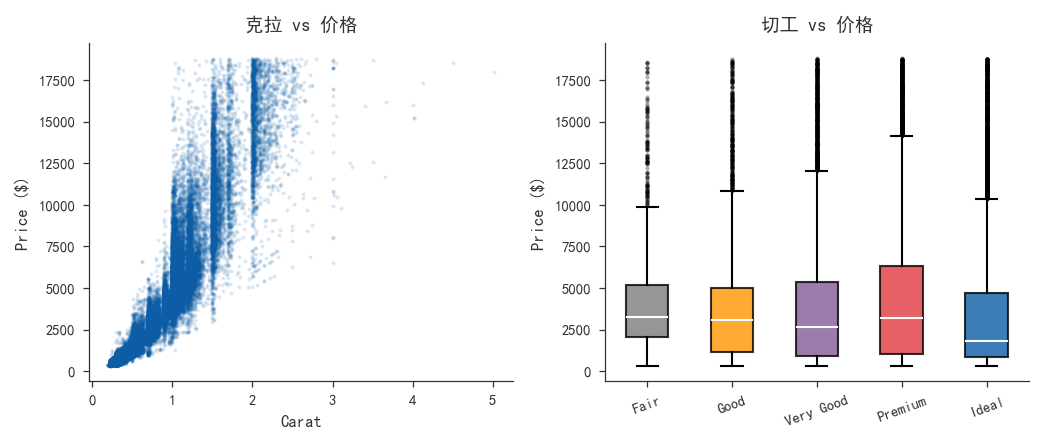

In [9]:
diamonds = pd.read_csv(DATA / 'diamonds.csv')
print(f'共 {len(diamonds)} 条')

fig, axes = plt.subplots(1, 2, figsize=(7, 3))
axes[0].scatter(diamonds['carat'], diamonds['price'], c=C[0], s=1, alpha=0.1, rasterized=True)
axes[0].set_xlabel('Carat'); axes[0].set_ylabel('Price ($)'); axes[0].set_title('克拉 vs 价格')

cut_order = ['Fair','Good','Very Good','Premium','Ideal']
bp = axes[1].boxplot([diamonds[diamonds['cut']==c]['price'] for c in cut_order],
                      labels=cut_order, patch_artist=True, widths=0.5,
                      medianprops={'color':'white','linewidth':1}, flierprops={'markersize':1,'alpha':0.3})
for p, c in zip(bp['boxes'], [C[5],C[3],C[4],C[1],C[0]]): p.set_facecolor(c); p.set_alpha(0.8)
axes[1].set_ylabel('Price ($)'); axes[1].set_title('切工 vs 价格'); axes[1].tick_params(axis='x', rotation=20)

plt.tight_layout(); plt.show()

Ideal 切工中位价反而不高，因为 Ideal 钻石普遍克拉小。

---
## 6. MPG — 汽车油耗（398 条）

1970-1982 年间汽车的油耗、气缸数、马力、重量等。

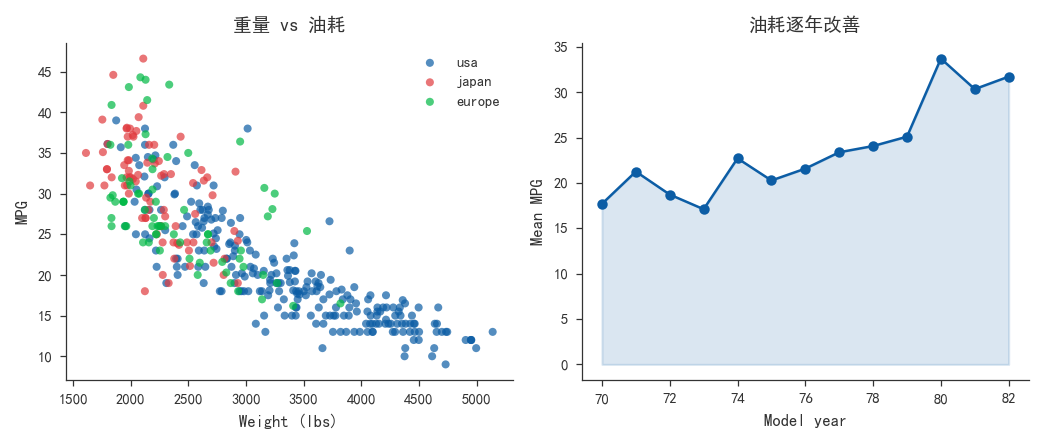

In [10]:
mpg = pd.read_csv(DATA / 'mpg.csv')

fig, axes = plt.subplots(1, 2, figsize=(7, 3))
for i, orig in enumerate(mpg['origin'].unique()):
    sub = mpg[mpg['origin']==orig]
    axes[0].scatter(sub['weight'], sub['mpg'], c=C[i], s=15, alpha=0.7, label=orig, edgecolors='none')
axes[0].set_xlabel('Weight (lbs)'); axes[0].set_ylabel('MPG'); axes[0].set_title('重量 vs 油耗'); axes[0].legend(frameon=False)

yearly_mpg = mpg.groupby('model_year')['mpg'].mean()
axes[1].fill_between(yearly_mpg.index, yearly_mpg.values, alpha=0.15, color=C[0])
axes[1].plot(yearly_mpg.index, yearly_mpg.values, 'o-', color=C[0], linewidth=1.2, markersize=4)
axes[1].set_xlabel('Model year'); axes[1].set_ylabel('Mean MPG'); axes[1].set_title('油耗逐年改善')

plt.tight_layout(); plt.show()

日本车轻且省油，70 年代石油危机后油耗改善明显。

---
## 7. Flights — 航班乘客（144 条）

1949-1960 年国际航班每月乘客数量。

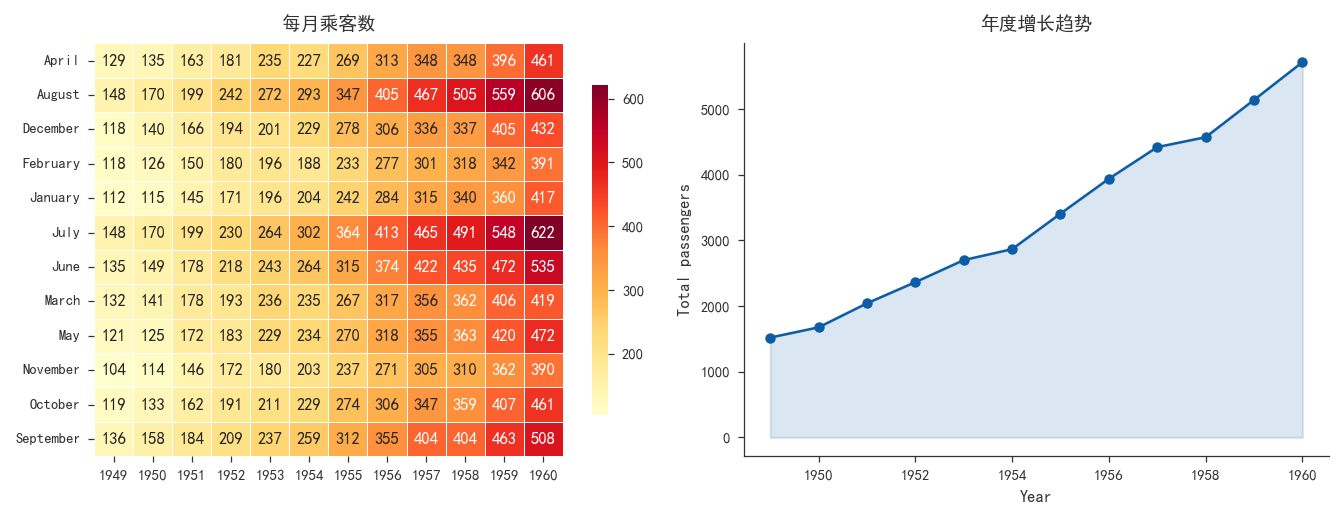

1949-1960 年增长 276%


In [11]:
flights = pd.read_csv(DATA / 'flights.csv')
flights_pivot = flights.pivot_table(index='month', columns='year', values='passengers').astype(int)

fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))

sns.heatmap(flights_pivot, cmap='YlOrRd', annot=True, fmt='d',
            linewidths=0.3, linecolor='white', cbar_kws={'shrink':0.8}, ax=axes[0])
axes[0].set_title('每月乘客数'); axes[0].set_ylabel(''); axes[0].set_xlabel('')

yearly = flights.groupby('year')['passengers'].sum()
axes[1].fill_between(yearly.index, yearly.values, alpha=0.15, color=C[0])
axes[1].plot(yearly.index, yearly.values, 'o-', color=C[0], linewidth=1.2, markersize=4)
axes[1].set_xlabel('Year'); axes[1].set_ylabel('Total passengers'); axes[1].set_title('年度增长趋势')

plt.tight_layout(); plt.show()
print(f'{yearly.index[0]}-{yearly.index[-1]} 年增长 {(yearly.iloc[-1]/yearly.iloc[0]-1)*100:.0f}%')

夏季是出行高峰，12 年间乘客增长近 3 倍。

---
## 8. Anscombe — 安斯库姆四重奏（44 条）

四组数据的均值、方差、相关系数、回归线几乎一样，但图形完全不同。统计学经典案例：**不能只看数字，要看图**。

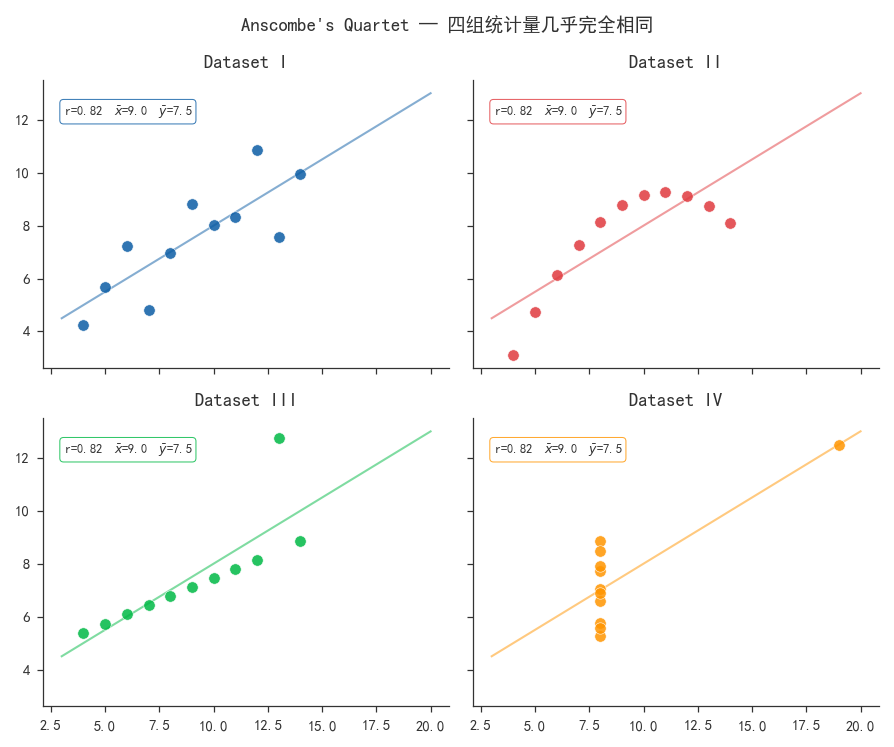

In [12]:
anscombe = pd.read_csv(DATA / 'anscombe.csv')

fig, axes = plt.subplots(2, 2, figsize=(6, 5), sharex=True, sharey=True)
for idx, (name, group) in enumerate(anscombe.groupby('dataset')):
    ax = axes[idx//2, idx%2]
    ax.scatter(group['x'], group['y'], c=C[idx], s=30, alpha=0.85, edgecolors='white', linewidths=0.3, zorder=5)
    z = np.polyfit(group['x'], group['y'], 1)
    x_line = np.linspace(3, 20, 50)
    ax.plot(x_line, np.polyval(z, x_line), color=C[idx], linewidth=1, alpha=0.5)
    # 标注统计量
    r = np.corrcoef(group['x'], group['y'])[0,1]
    ax.text(0.05, 0.92, f'r={r:.2f}  $\\bar{{x}}$={group["x"].mean():.1f}  $\\bar{{y}}$={group["y"].mean():.1f}',
            transform=ax.transAxes, fontsize=6, va='top',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor=C[idx], alpha=0.8, linewidth=0.5))
    ax.set_title(f'Dataset {name}')

fig.suptitle("Anscombe's Quartet — 四组统计量几乎完全相同", fontsize=9, fontweight='bold')
plt.tight_layout(); plt.show()

---
## 9. Geyser — 老忠实泉（272 条）

黄石公园老忠实泉的喷发持续时间和等待间隔。

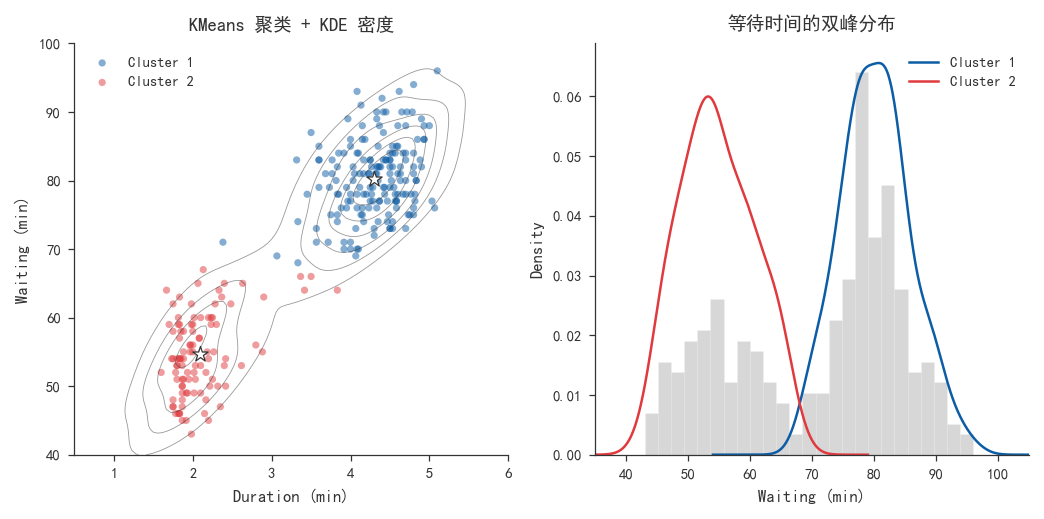

In [13]:
from sklearn.cluster import KMeans

geyser = pd.read_csv(DATA / 'geyser.csv')

# KMeans 自动识别两种喷发模式
X = geyser[['duration','waiting']].values
km = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X)
geyser['cluster'] = km.labels_

fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))

# 左图：KMeans 聚类 + 2D KDE 等高线
for i in range(2):
    sub = geyser[geyser['cluster']==i]
    axes[0].scatter(sub['duration'], sub['waiting'], c=C[i], s=12, alpha=0.5, edgecolors='none', label=f'Cluster {i+1}')
# 叠加 KDE 等高线
from scipy.stats import gaussian_kde
xy = np.vstack([geyser['duration'], geyser['waiting']])
kde = gaussian_kde(xy)
xg, yg = np.mgrid[0.5:6:100j, 40:100:100j]
z = kde(np.vstack([xg.ravel(), yg.ravel()])).reshape(xg.shape)
axes[0].contour(xg, yg, z, levels=6, colors='#333', linewidths=0.4, alpha=0.5)
axes[0].scatter(*km.cluster_centers_.T, c='white', s=60, marker='*', edgecolors='#333', linewidths=0.6, zorder=10)
axes[0].set_xlabel('Duration (min)'); axes[0].set_ylabel('Waiting (min)')
axes[0].set_title('KMeans 聚类 + KDE 密度'); axes[0].legend(frameon=False)

# 右图：双峰核密度
for i in range(2):
    sub = geyser[geyser['cluster']==i]
    sub['waiting'].plot.kde(ax=axes[1], color=C[i], linewidth=1.2, label=f'Cluster {i+1}')
axes[1].hist(geyser['waiting'], bins=25, density=True, color=C[5], edgecolor='white', linewidth=0.3, alpha=0.3)
axes[1].set_xlabel('Waiting (min)'); axes[1].set_ylabel('Density')
axes[1].set_title('等待时间的双峰分布'); axes[1].legend(frameon=False); axes[1].set_xlim(35, 105)

plt.tight_layout(); plt.show()

明显的双峰分布：短喷发（~2min）后等约 55 分钟，长喷发（~4.5min）后等约 80 分钟。

---
## 10. Dowjones — 道琼斯指数（1264 条）

1914 年至今的月度收盘价。

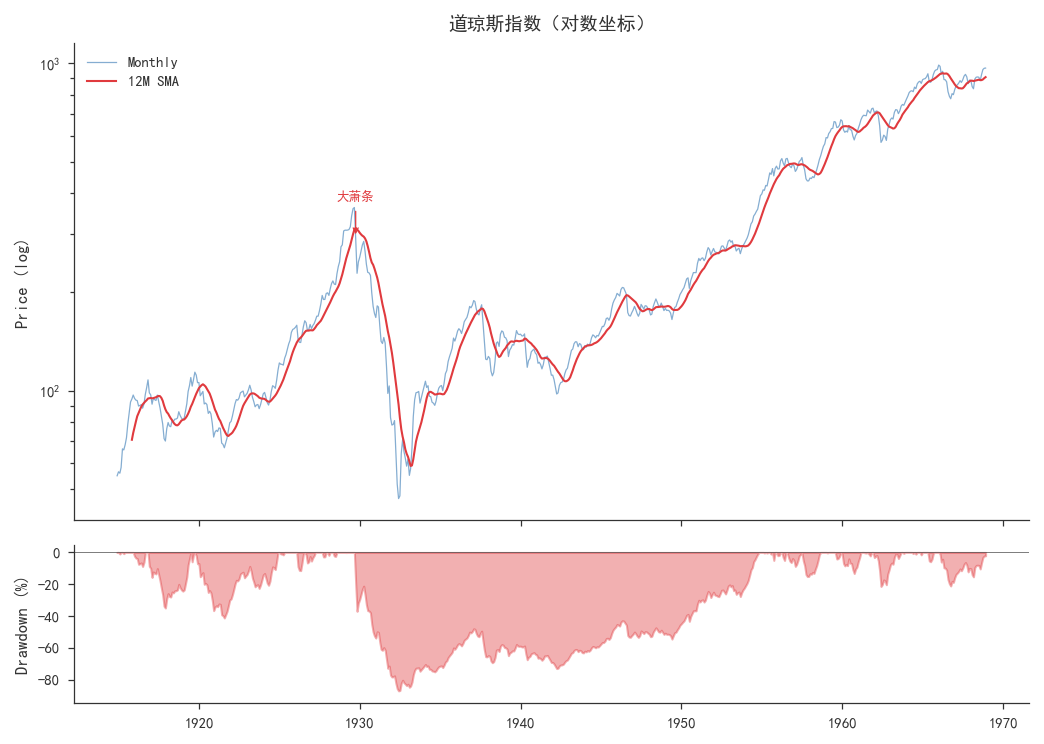

In [14]:
dowjones = pd.read_csv(DATA / 'dowjones.csv')
dowjones['Date'] = pd.to_datetime(dowjones['Date'])

fig, axes = plt.subplots(2, 1, figsize=(7, 5), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# 上图：对数坐标 + 12 月移动均线
axes[0].semilogy(dowjones['Date'], dowjones['Price'], color=C[0], linewidth=0.6, alpha=0.5, label='Monthly')
sma = dowjones['Price'].rolling(12).mean()
axes[0].semilogy(dowjones['Date'], sma, color=C[1], linewidth=1, label='12M SMA')
# 标注关键事件
events = {'1929-10': '大萧条', '1987-10': '黑色星期一', '2008-09': '金融危机'}
for date_str, label in events.items():
    d = pd.to_datetime(date_str)
    p = dowjones.loc[(dowjones['Date'] - d).abs().idxmin(), 'Price']
    axes[0].annotate(label, xy=(d, p), xytext=(0, 18), textcoords='offset points',
                     fontsize=6, ha='center', color=C[1],
                     arrowprops=dict(arrowstyle='->', color=C[1], lw=0.6))
axes[0].set_ylabel('Price (log)'); axes[0].set_title('道琼斯指数（对数坐标）')
axes[0].legend(frameon=False, loc='upper left')

# 下图：回撤率
peak = dowjones['Price'].cummax()
drawdown = (dowjones['Price'] - peak) / peak * 100
axes[1].fill_between(dowjones['Date'], drawdown, color=C[1], alpha=0.4)
axes[1].set_ylabel('Drawdown (%)'); axes[1].set_ylim(-95, 5)
axes[1].axhline(0, color='#333', linewidth=0.3)

plt.tight_layout(); plt.show()

---
## 11. Healthexp — 医疗支出 vs 寿命

各国历年人均医疗支出和预期寿命。

6 个国家, 274 条记录


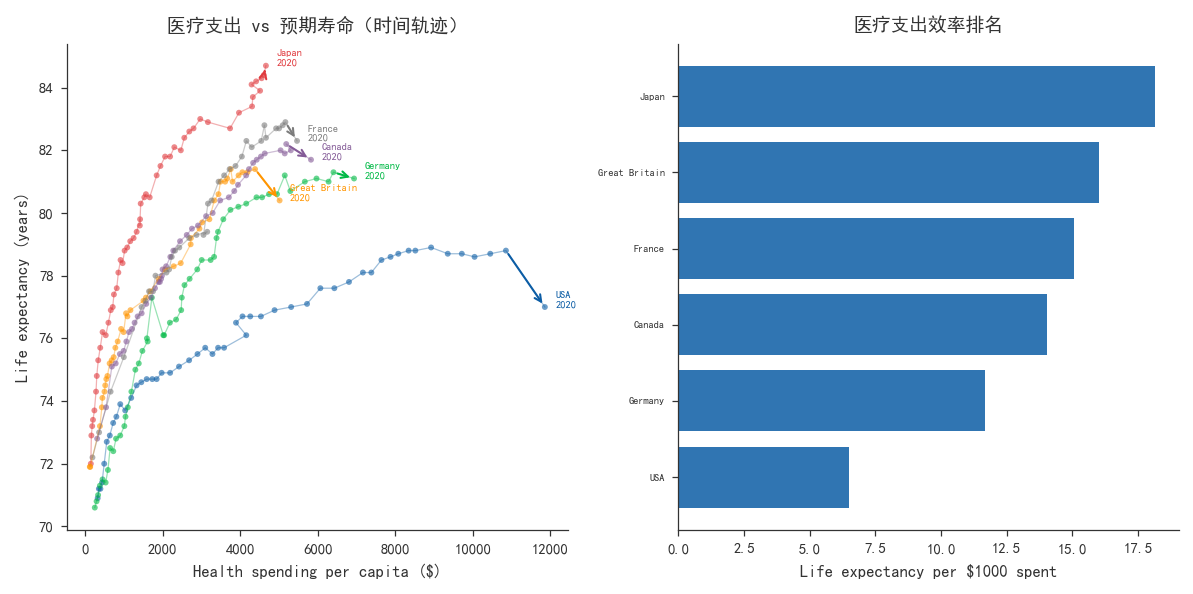

In [15]:
healthexp = pd.read_csv(DATA / 'healthexp.csv')
print(f'{healthexp["Country"].nunique()} 个国家, {len(healthexp)} 条记录')

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# 左图：Connected scatter — 各国医疗支出vs寿命的时间轨迹
countries = ['USA', 'Japan', 'Germany', 'Great Britain', 'Canada', 'France']
for i, country in enumerate(countries):
    sub = healthexp[healthexp['Country']==country].sort_values('Year')
    ax = axes[0]
    ax.plot(sub['Spending_USD'], sub['Life_Expectancy'], '-', color=C[i%len(C)], linewidth=0.6, alpha=0.4)
    ax.scatter(sub['Spending_USD'], sub['Life_Expectancy'], c=C[i%len(C)], s=8, alpha=0.6, edgecolors='none')
    # 标注起点和终点年份
    ax.annotate(f"{country}\n{int(sub['Year'].iloc[-1])}", 
                xy=(sub['Spending_USD'].iloc[-1], sub['Life_Expectancy'].iloc[-1]),
                fontsize=5, color=C[i%len(C)], fontweight='bold',
                xytext=(5, 0), textcoords='offset points')
    # 箭头指示方向（倒数第二到最后一个点）
    if len(sub) > 1:
        ax.annotate('', xy=(sub['Spending_USD'].iloc[-1], sub['Life_Expectancy'].iloc[-1]),
                    xytext=(sub['Spending_USD'].iloc[-2], sub['Life_Expectancy'].iloc[-2]),
                    arrowprops=dict(arrowstyle='->', color=C[i%len(C)], lw=1))

axes[0].set_xlabel('Health spending per capita ($)')
axes[0].set_ylabel('Life expectancy (years)')
axes[0].set_title('医疗支出 vs 预期寿命（时间轨迹）')

# 右图：效率排名 — 每美元买到多少寿命
latest = healthexp.groupby('Country').apply(lambda x: x.loc[x['Year'].idxmax()])
latest['efficiency'] = latest['Life_Expectancy'] / latest['Spending_USD'] * 1000  # 每1000美元对应的寿命年
latest = latest.sort_values('efficiency', ascending=True)

colors = [C[1] if c in countries else C[5] for c in latest['Country']]
highlight = [C[0] if c in countries else C[5] for c in latest['Country']]
axes[1].barh(range(len(latest)), latest['efficiency'], color=highlight, alpha=0.85)
axes[1].set_yticks(range(len(latest)))
axes[1].set_yticklabels(latest['Country'], fontsize=5)
axes[1].set_xlabel('Life expectancy per $1000 spent')
axes[1].set_title('医疗支出效率排名')

plt.tight_layout(); plt.show()

美国花钱最多但寿命不是最高，日本花得少但寿命最长。

---
## 12. Seaice — 北极海冰（13175 条）

1980 年至今的北极海冰面积观测。

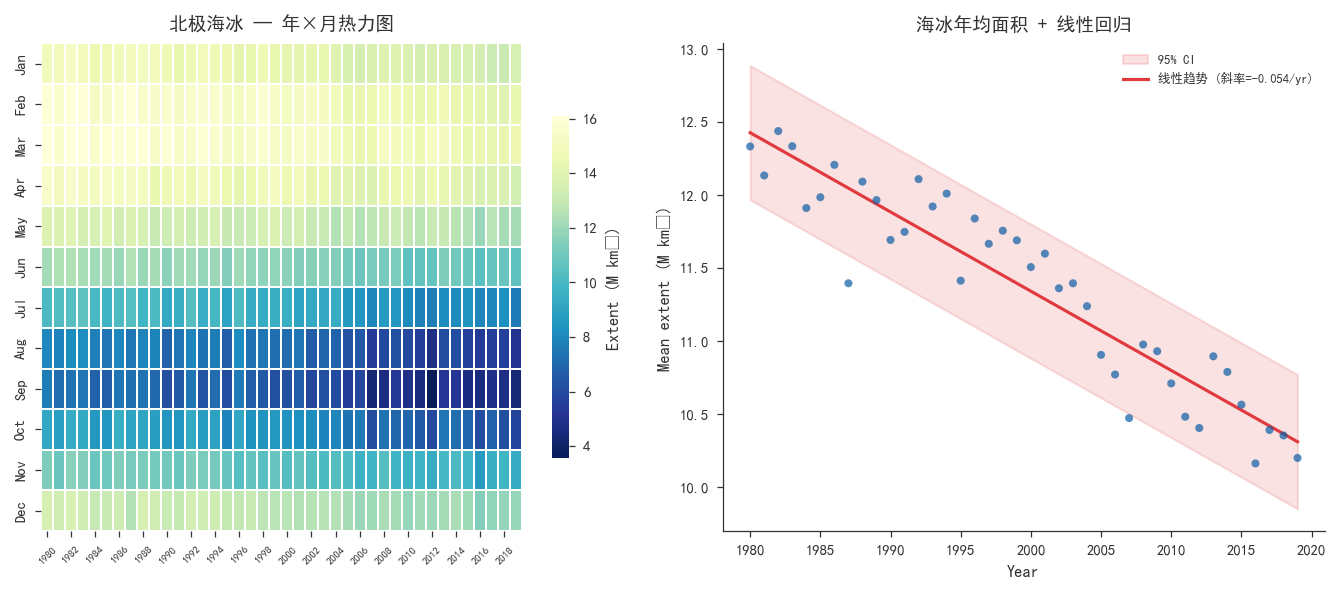

每年平均减少 0.054 M km², R²=0.877


In [16]:
seaice = pd.read_csv(DATA / 'seaice.csv')
seaice['Date'] = pd.to_datetime(seaice['Date'])
seaice['year'] = seaice['Date'].dt.year
seaice['month'] = seaice['Date'].dt.month

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# 左图：Year×Month 热力图
pivot = seaice.groupby(['year','month'])['Extent'].mean().reset_index()
heatmap_data = pivot.pivot(index='month', columns='year', values='Extent')
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
heatmap_data.index = month_names[:len(heatmap_data)]
sns.heatmap(heatmap_data, cmap='YlGnBu_r', ax=axes[0], cbar_kws={'shrink':0.7, 'label':'Extent (M km²)'},
            linewidths=0.1, linecolor='white')
axes[0].set_title('北极海冰 — 年×月热力图'); axes[0].set_ylabel(''); axes[0].set_xlabel('')
axes[0].tick_params(axis='x', labelsize=5, rotation=45)

# 右图：线性回归趋势 + 置信区间
from sklearn.linear_model import LinearRegression
yearly_ice = seaice.groupby('year')['Extent'].mean()
X = yearly_ice.index.values.reshape(-1, 1)
y = yearly_ice.values
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
residuals = y - y_pred
se = np.std(residuals)
ci_upper = y_pred + 1.96 * se
ci_lower = y_pred - 1.96 * se

axes[1].fill_between(X.ravel(), ci_lower, ci_upper, alpha=0.15, color=C[1], label='95% CI')
axes[1].scatter(yearly_ice.index, yearly_ice.values, c=C[0], s=15, alpha=0.7, zorder=5, edgecolors='none')
axes[1].plot(X.ravel(), y_pred, color=C[1], linewidth=1.5, label=f'线性趋势 (斜率={reg.coef_[0]:.3f}/yr)')
axes[1].set_xlabel('Year'); axes[1].set_ylabel('Mean extent (M km²)')
axes[1].set_title('海冰年均面积 + 线性回归'); axes[1].legend(frameon=False, fontsize=6)

plt.tight_layout(); plt.show()
print(f'每年平均减少 {abs(reg.coef_[0]):.3f} M km², R²={reg.score(X, y):.3f}')

北极海冰在持续缩小，全球变暖的直观证据。

---
## 13. Planets — 系外行星（1035 条）

已发现系外行星的探测方法、轨道周期、质量、距离和发现年份。

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


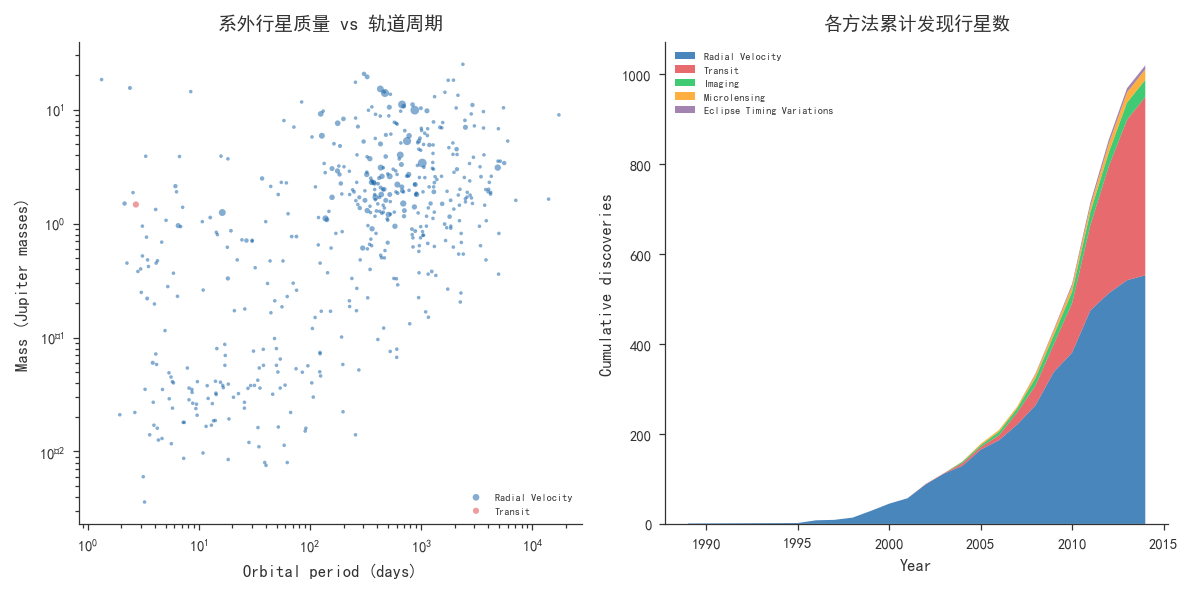

In [17]:
planets = pd.read_csv(DATA / 'planets.csv')

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# 左图：log-log 质量vs周期气泡图，气泡大小=距离
sub = planets.dropna(subset=['mass','orbital_period','distance'])
top4 = sub['method'].value_counts().head(4).index
sub_top = sub[sub['method'].isin(top4)]
for i, m in enumerate(top4):
    s = sub_top[sub_top['method']==m]
    axes[0].scatter(s['orbital_period'], s['mass'], s=np.clip(s['distance']*0.05, 3, 80),
                    c=C[i], alpha=0.5, edgecolors='none', label=m)
axes[0].set_xscale('log'); axes[0].set_yscale('log')
axes[0].set_xlabel('Orbital period (days)'); axes[0].set_ylabel('Mass (Jupiter masses)')
axes[0].set_title('系外行星质量 vs 轨道周期'); axes[0].legend(frameon=False, fontsize=5, loc='lower right')

# 右图：累计发现 — 堆叠面积图
top5 = planets['method'].value_counts().head(5).index
by_year_method = planets[planets['method'].isin(top5)].groupby(['year','method']).size().unstack(fill_value=0)
cum = by_year_method.cumsum()
axes[1].stackplot(cum.index, [cum[m] for m in top5], labels=top5, colors=C[:5], alpha=0.75)
axes[1].set_xlabel('Year'); axes[1].set_ylabel('Cumulative discoveries')
axes[1].set_title('各方法累计发现行星数'); axes[1].legend(frameon=False, fontsize=5, loc='upper left')

plt.tight_layout(); plt.show()

径向速度法最早，凌日法（Transit）后来居上，开普勒望远镜功不可没。

---
## 14. Car_crashes — 美国各州车祸统计（51 条）

各州的车祸率、超速/酒驾/分心比例及保费。

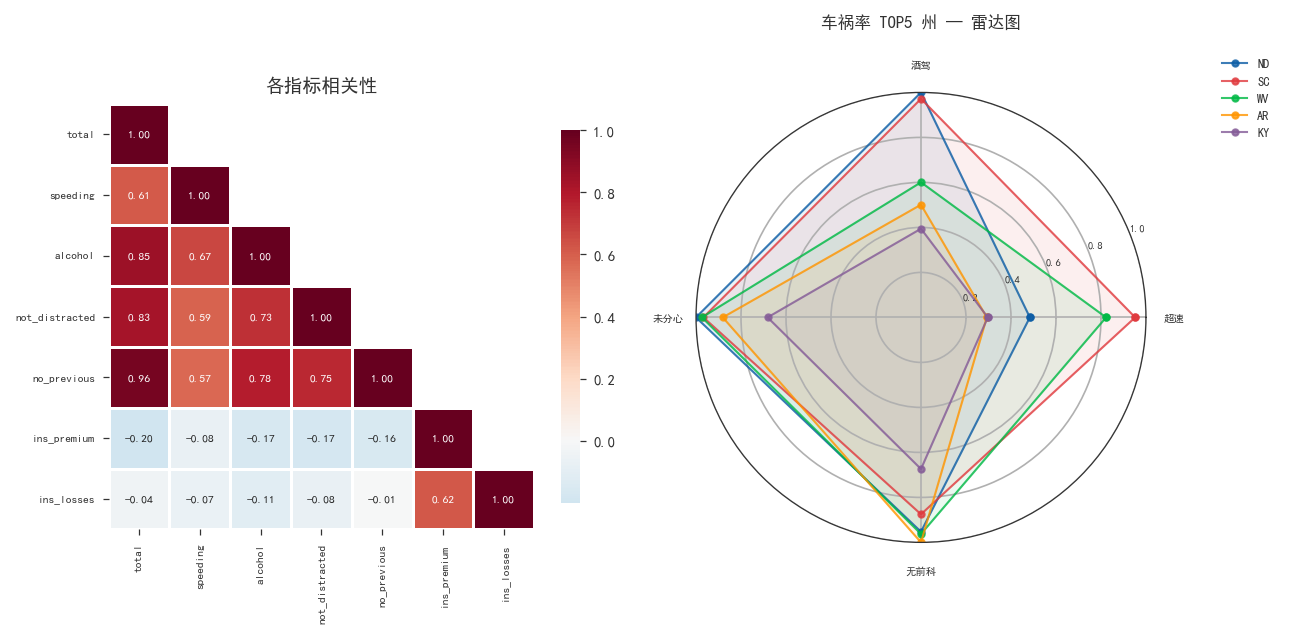

In [18]:
crashes = pd.read_csv(DATA / 'car_crashes.csv')

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# 左图：相关性热力图
numeric_cols = ['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium', 'ins_losses']
corr = crashes[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
sns.heatmap(corr, mask=mask, cmap='RdBu_r', center=0, annot=True, fmt='.2f',
            linewidths=0.5, linecolor='white', ax=axes[0], square=True,
            cbar_kws={'shrink': 0.7}, annot_kws={'fontsize': 5.5})
axes[0].set_title('各指标相关性'); axes[0].tick_params(labelsize=5.5)

# 右图：雷达图 — 车祸率最高的5个州
from matplotlib.patches import FancyBboxPatch
top5 = crashes.nlargest(5, 'total')
categories = ['speeding', 'alcohol', 'not_distracted', 'no_previous']
cat_labels = ['超速', '酒驾', '未分心', '无前科']

# 归一化到 0-1
norm_data = top5[categories].copy()
for col in categories:
    norm_data[col] = (norm_data[col] - crashes[col].min()) / (crashes[col].max() - crashes[col].min())

angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

ax_radar = fig.add_axes([0.58, 0.15, 0.38, 0.75], polar=True)
axes[1].set_visible(False)

for i, (_, row) in enumerate(norm_data.iterrows()):
    values = row[categories].tolist()
    values += values[:1]
    ax_radar.plot(angles, values, 'o-', color=C[i], linewidth=1, markersize=3, alpha=0.8,
                  label=top5.iloc[i]['abbrev'])
    ax_radar.fill(angles, values, color=C[i], alpha=0.08)

ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(cat_labels, fontsize=6)
ax_radar.set_title('车祸率 TOP5 州 — 雷达图', fontsize=8, fontweight='bold', pad=15)
ax_radar.legend(frameon=False, fontsize=6, loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax_radar.set_ylim(0, 1)
ax_radar.tick_params(labelsize=5)

plt.tight_layout(); plt.show()

---
## 15. Taxis — 纽约出租车（6433 条）

NYC 出租车行程的上下车时间、距离、费用和小费。

6433 条行程记录


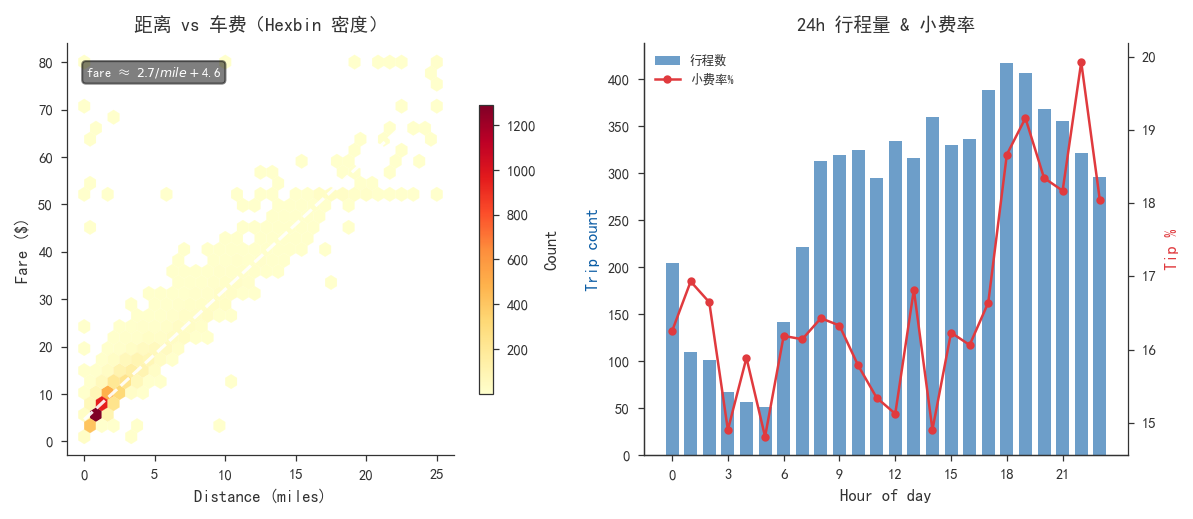

In [19]:
taxis = pd.read_csv(DATA / 'taxis.csv')
taxis['pickup_dt'] = pd.to_datetime(taxis['pickup'])
taxis['hour'] = taxis['pickup_dt'].dt.hour
print(f'{len(taxis)} 条行程记录')

fig, axes = plt.subplots(1, 2, figsize=(8, 3.5))

# 左图：Hexbin 密度图 — 距离 vs 车费
hb = axes[0].hexbin(taxis['distance'].clip(0, 25), taxis['fare'].clip(0, 80),
                     gridsize=30, cmap='YlOrRd', mincnt=1, linewidths=0.1)
plt.colorbar(hb, ax=axes[0], shrink=0.7, label='Count')
# 叠加线性拟合
mask = (taxis['distance'] > 0) & (taxis['distance'] < 25) & (taxis['fare'] > 0) & (taxis['fare'] < 80)
z = np.polyfit(taxis.loc[mask, 'distance'], taxis.loc[mask, 'fare'], 1)
x_fit = np.linspace(0, 25, 100)
axes[0].plot(x_fit, np.polyval(z, x_fit), '--', color='white', linewidth=1.5, alpha=0.9)
axes[0].text(0.05, 0.92, f'fare ≈ ${z[0]:.1f}/mile + ${z[1]:.1f}', transform=axes[0].transAxes,
             fontsize=6, color='white', fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='black', alpha=0.5))
axes[0].set_xlabel('Distance (miles)'); axes[0].set_ylabel('Fare ($)')
axes[0].set_title('距离 vs 车费（Hexbin 密度）')

# 右图：24 小时行程量 + 平均小费率
hourly_count = taxis.groupby('hour').size()
hourly_tip_pct = taxis.groupby('hour').apply(lambda x: (x['tip'] / x['fare'].clip(1)).mean() * 100)

ax2 = axes[1].twinx()
axes[1].bar(hourly_count.index, hourly_count.values, color=C[0], alpha=0.6, width=0.7, label='行程数')
ax2.plot(hourly_tip_pct.index, hourly_tip_pct.values, 'o-', color=C[1], linewidth=1.2, markersize=3, label='小费率%')
axes[1].set_xlabel('Hour of day'); axes[1].set_ylabel('Trip count', color=C[0])
ax2.set_ylabel('Tip %', color=C[1]); ax2.spines['right'].set_visible(True)
axes[1].set_title('24h 行程量 & 小费率'); axes[1].set_xticks(range(0, 24, 3))

# 合并图例
lines1, labels1 = axes[1].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
axes[1].legend(lines1+lines2, labels1+labels2, frameon=False, fontsize=6, loc='upper left')

plt.tight_layout(); plt.show()

距离和车费线性关系明显，小费集中在 0-3 美元。

---
## 16. fMRI — 脑成像信号（1064 条）

受试者在不同刺激下的脑区信号强度随时间变化。

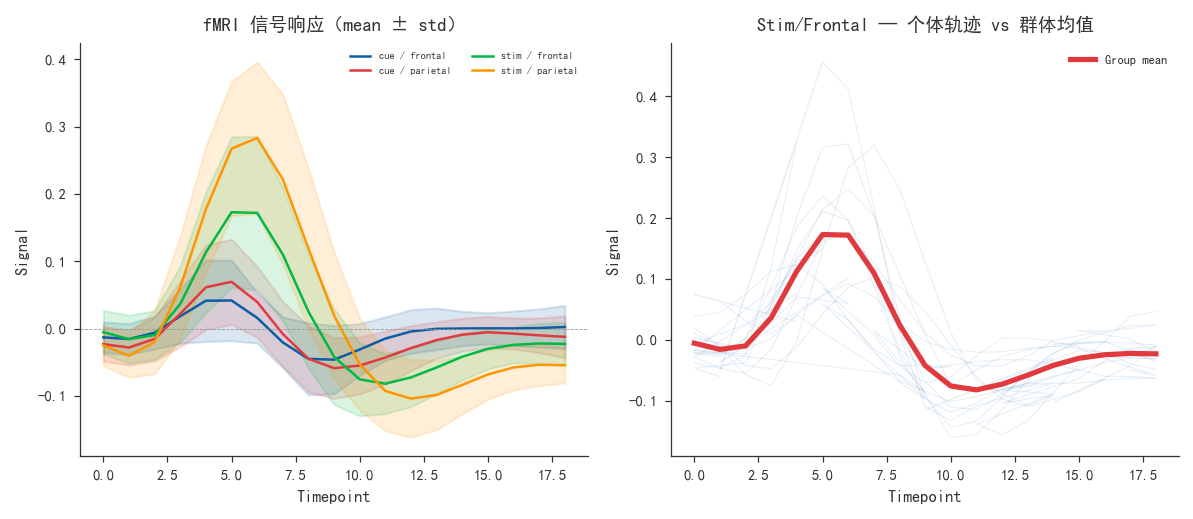

In [20]:
fmri = pd.read_csv(DATA / 'fmri.csv')

fig, axes = plt.subplots(1, 2, figsize=(8, 3.5))

# 左图：Ribbon plot — mean ± std 色带
for i, (name, group) in enumerate(fmri.groupby(['event', 'region'])):
    stats = group.groupby('timepoint')['signal'].agg(['mean', 'std'])
    label = f'{name[0]} / {name[1]}'
    axes[0].fill_between(stats.index, stats['mean']-stats['std'], stats['mean']+stats['std'],
                         alpha=0.15, color=C[i])
    axes[0].plot(stats.index, stats['mean'], '-', color=C[i], linewidth=1.2, label=label)
axes[0].axhline(0, color='#999', linewidth=0.4, linestyle='--')
axes[0].set_xlabel('Timepoint'); axes[0].set_ylabel('Signal')
axes[0].set_title('fMRI 信号响应（mean ± std）')
axes[0].legend(frameon=False, fontsize=5, ncol=2)

# 右图：个体受试者轨迹（spaghetti plot）+ 整体趋势
stim_frontal = fmri[(fmri['event']=='stim') & (fmri['region']=='frontal')]
for subj in stim_frontal['subject'].unique():
    sub = stim_frontal[stim_frontal['subject']==subj]
    axes[1].plot(sub['timepoint'], sub['signal'], color=C[0], alpha=0.1, linewidth=0.5)
# 整体平均粗线
avg = stim_frontal.groupby('timepoint')['signal'].mean()
axes[1].plot(avg.index, avg.values, color=C[1], linewidth=2.5, label='Group mean', zorder=10)
axes[1].set_xlabel('Timepoint'); axes[1].set_ylabel('Signal')
axes[1].set_title('Stim/Frontal — 个体轨迹 vs 群体均值')
axes[1].legend(frameon=False, fontsize=6)

plt.tight_layout(); plt.show()

视觉刺激（stim）在前额叶和顶叶引起不同的信号响应模式。

---
## 17. Exercise — 运动与脉搏（90 条）

不同运动方式和饮食条件下的脉搏变化。

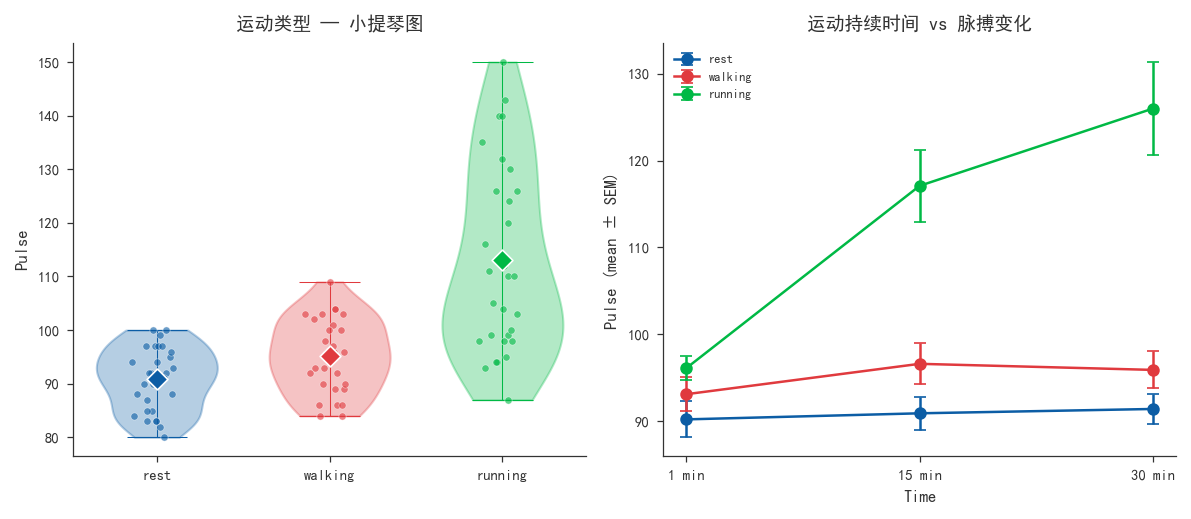

In [21]:
exercise = pd.read_csv(DATA / 'exercise.csv')

fig, axes = plt.subplots(1, 2, figsize=(8, 3.5))

# 左图：Violin + Strip overlay
kinds = exercise['kind'].unique()
for i, kind in enumerate(kinds):
    sub = exercise[exercise['kind']==kind]['pulse']
    vp = axes[0].violinplot(sub, positions=[i], showmeans=False, showmedians=False, widths=0.7)
    for body in vp['bodies']:
        body.set_facecolor(C[i]); body.set_alpha(0.3); body.set_edgecolor(C[i])
    for part in vp:
        if part != 'bodies':
            vp[part].set_color(C[i]); vp[part].set_linewidth(0.5)
    # Strip 散点叠加
    jitter = np.random.normal(0, 0.06, len(sub))
    axes[0].scatter(np.full(len(sub), i) + jitter, sub, c=C[i], s=12, alpha=0.6, edgecolors='white', linewidths=0.3, zorder=5)
    axes[0].scatter(i, sub.mean(), c=C[i], s=50, marker='D', edgecolors='white', linewidths=0.8, zorder=10)

axes[0].set_xticks(range(len(kinds))); axes[0].set_xticklabels(kinds)
axes[0].set_ylabel('Pulse'); axes[0].set_title('运动类型 — 小提琴图')

# 右图：时间维度 — 各运动在不同时间点的变化
time_order = ['1 min', '15 min', '30 min']
for i, kind in enumerate(kinds):
    sub = exercise[exercise['kind']==kind]
    means = [sub[sub['time']==t]['pulse'].mean() for t in time_order]
    sems = [sub[sub['time']==t]['pulse'].sem() for t in time_order]
    axes[1].errorbar(range(len(time_order)), means, yerr=sems,
                     fmt='o-', color=C[i], linewidth=1.2, markersize=5, capsize=3, capthick=0.8, label=kind)

axes[1].set_xticks(range(len(time_order))); axes[1].set_xticklabels(time_order)
axes[1].set_xlabel('Time'); axes[1].set_ylabel('Pulse (mean ± SEM)')
axes[1].set_title('运动持续时间 vs 脉搏变化'); axes[1].legend(frameon=False, fontsize=6)

plt.tight_layout(); plt.show()

---
## 18. Attention — 注意力实验（60 条）

分散注意力和集中注意力条件下的任务得分。

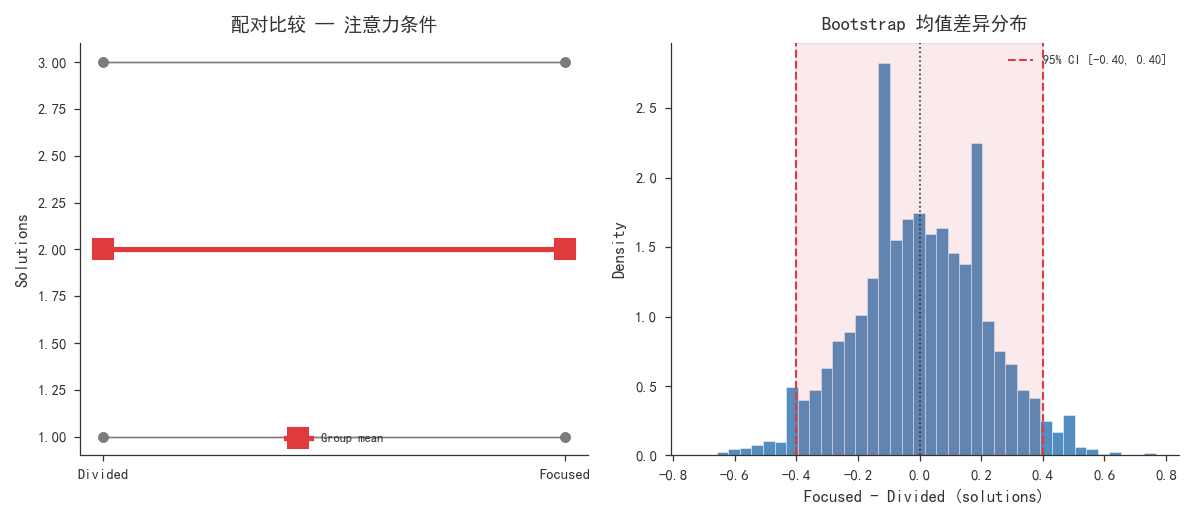

In [22]:
attention = pd.read_csv(DATA / 'attention.csv')

fig, axes = plt.subplots(1, 2, figsize=(8, 3.5))

# 左图：配对比较 — 每个被试在两种条件下的连线
focused = attention[attention['attention']=='focused'].sort_values('subject')
divided = attention[attention['attention']=='divided'].sort_values('subject')

for j in range(len(focused)):
    axes[0].plot([0, 1], [divided.iloc[j]['solutions'], focused.iloc[j]['solutions']],
                 'o-', color=C[5], alpha=0.3, linewidth=0.6, markersize=4)
# 均值加粗
axes[0].plot([0, 1], [divided['solutions'].mean(), focused['solutions'].mean()],
             's-', color=C[1], linewidth=2.5, markersize=10, zorder=10, label='Group mean')
axes[0].set_xticks([0, 1]); axes[0].set_xticklabels(['Divided', 'Focused'])
axes[0].set_ylabel('Solutions'); axes[0].set_title('配对比较 — 注意力条件')
axes[0].legend(frameon=False, fontsize=6)

# 右图：Bootstrap 置信区间对比
from scipy import stats as sp_stats
n_boot = 5000
boot_focused = [np.random.choice(focused['solutions'], len(focused), replace=True).mean() for _ in range(n_boot)]
boot_divided = [np.random.choice(divided['solutions'], len(divided), replace=True).mean() for _ in range(n_boot)]
boot_diff = np.array(boot_focused) - np.array(boot_divided)

axes[1].hist(boot_diff, bins=40, color=C[0], edgecolor='white', linewidth=0.3, alpha=0.7, density=True)
ci = np.percentile(boot_diff, [2.5, 97.5])
axes[1].axvline(ci[0], color=C[1], linewidth=1, linestyle='--', label=f'95% CI [{ci[0]:.2f}, {ci[1]:.2f}]')
axes[1].axvline(ci[1], color=C[1], linewidth=1, linestyle='--')
axes[1].axvline(0, color='#333', linewidth=0.8, linestyle=':')
axes[1].axvspan(ci[0], ci[1], alpha=0.1, color=C[1])
axes[1].set_xlabel('Focused - Divided (solutions)'); axes[1].set_ylabel('Density')
axes[1].set_title('Bootstrap 均值差异分布'); axes[1].legend(frameon=False, fontsize=6)

plt.tight_layout(); plt.show()

集中注意力（focused）的解题数略高。

---
## 19. Anagrams — 字谜实验（20 条）

不同注意力条件下解字谜的正确数。

In [23]:
anagrams = pd.read_csv(DATA / 'anagrams.csv')
anagrams.head()

subidr    attnr  num1  num2  num3
0       1  divided     2   4.0     7
1       2  divided     3   4.0     5
2       3  divided     3   5.0     6
3       4  divided     5   7.0     5
4       5  divided     4   5.0     8

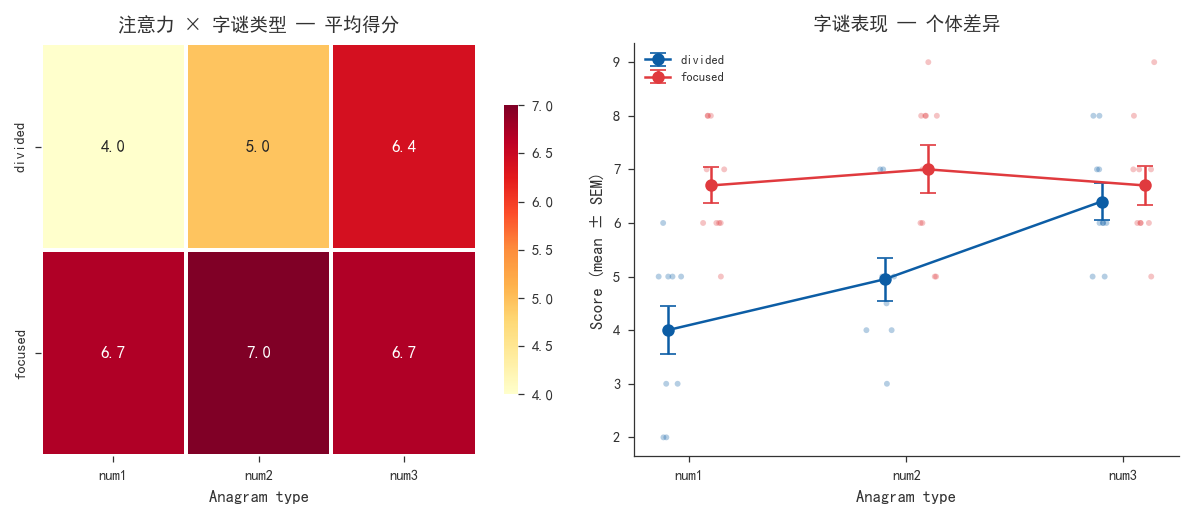

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3.5))

# 左图：热力图 — 注意力条件 × 字谜类型
pivot_ana = anagrams.melt(id_vars=['subidr','attnr'], var_name='num', value_name='score')
hm_data = pivot_ana.groupby(['attnr','num'])['score'].mean().unstack()
sns.heatmap(hm_data, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=1, linecolor='white',
            ax=axes[0], cbar_kws={'shrink': 0.7})
axes[0].set_title('注意力 × 字谜类型 — 平均得分')
axes[0].set_ylabel(''); axes[0].set_xlabel('Anagram type')

# 右图：带个体数据的 errorbar
for i, att in enumerate(pivot_ana['attnr'].unique()):
    sub = pivot_ana[pivot_ana['attnr']==att]
    means = sub.groupby('num')['score'].mean()
    sems = sub.groupby('num')['score'].sem()
    offset = -0.1 + i*0.2
    x = np.arange(len(means)) + offset
    axes[1].errorbar(x, means.values, yerr=sems.values, fmt='o-', color=C[i],
                     linewidth=1.2, markersize=5, capsize=4, capthick=0.8, label=att)
    # 散点显示个体
    for j, num in enumerate(means.index):
        vals = sub[sub['num']==num]['score'].values
        jitter = np.random.normal(0, 0.03, len(vals))
        axes[1].scatter(np.full(len(vals), x[j]) + jitter, vals, c=C[i], s=8, alpha=0.3, edgecolors='none')

axes[1].set_xticks(range(len(means))); axes[1].set_xticklabels(means.index)
axes[1].set_xlabel('Anagram type'); axes[1].set_ylabel('Score (mean ± SEM)')
axes[1].set_title('字谜表现 — 个体差异'); axes[1].legend(frameon=False, fontsize=6)

plt.tight_layout(); plt.show()

---
## 20. Dots — 视觉运动感知（848 条）

随机点运动实验中一致性、选择和神经放电率。

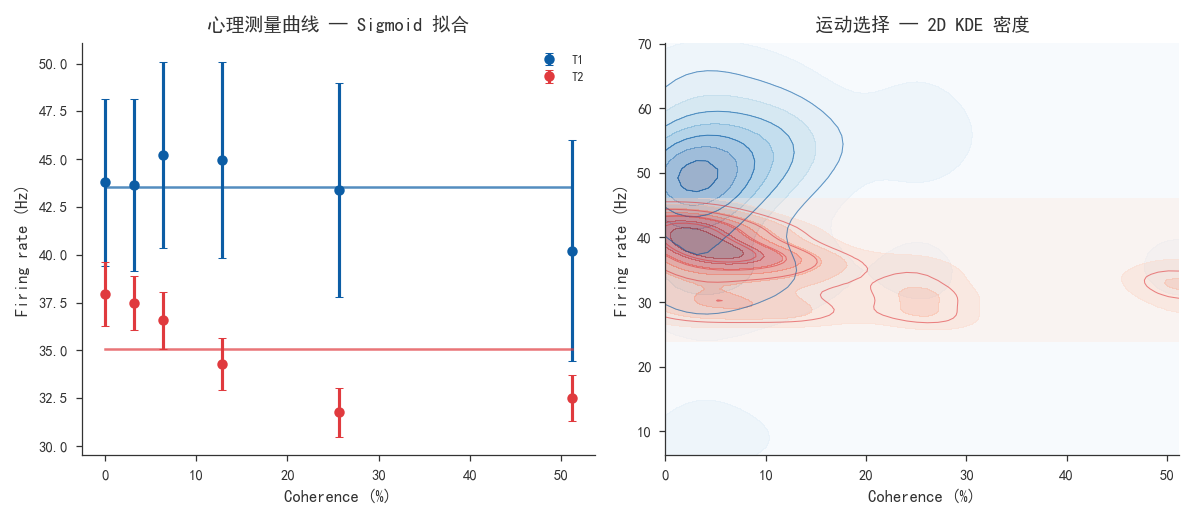

In [25]:
dots = pd.read_csv(DATA / 'dots.csv')
from scipy.optimize import curve_fit

fig, axes = plt.subplots(1, 2, figsize=(8, 3.5))

# 左图：Sigmoid 心理测量曲线拟合
def sigmoid(x, L, k, x0, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

for i, choice in enumerate(dots['choice'].unique()):
    sub = dots[dots['choice']==choice]
    avg = sub.groupby('coherence')['firing_rate'].agg(['mean', 'std'])
    
    # 散点 + error bar
    axes[0].errorbar(avg.index, avg['mean'], yerr=avg['std']/np.sqrt(10), fmt='o',
                     color=C[i], markersize=4, capsize=2, capthick=0.5, label=choice)
    # Sigmoid 拟合
    try:
        x_data = avg.index.values.astype(float)
        y_data = avg['mean'].values
        popt, _ = curve_fit(sigmoid, x_data, y_data, p0=[max(y_data)-min(y_data), 5, 50, min(y_data)], maxfev=5000)
        x_fit = np.linspace(x_data.min(), x_data.max(), 200)
        axes[0].plot(x_fit, sigmoid(x_fit, *popt), '-', color=C[i], linewidth=1.2, alpha=0.7)
    except:
        z = np.polyfit(x_data, y_data, 2)
        x_fit = np.linspace(x_data.min(), x_data.max(), 200)
        axes[0].plot(x_fit, np.polyval(z, x_fit), '-', color=C[i], linewidth=1.2, alpha=0.7)

axes[0].set_xlabel('Coherence (%)'); axes[0].set_ylabel('Firing rate (Hz)')
axes[0].set_title('心理测量曲线 — Sigmoid 拟合'); axes[0].legend(frameon=False, fontsize=6)

# 右图：2D 核密度估计 — coherence vs firing_rate
from scipy.stats import gaussian_kde
for i, choice in enumerate(dots['choice'].unique()):
    sub = dots[dots['choice']==choice]
    xy = np.vstack([sub['coherence'], sub['firing_rate']])
    kde = gaussian_kde(xy, bw_method=0.3)
    xg, yg = np.mgrid[sub['coherence'].min():sub['coherence'].max():50j,
                       sub['firing_rate'].min():sub['firing_rate'].max():50j]
    z = kde(np.vstack([xg.ravel(), yg.ravel()])).reshape(xg.shape)
    axes[1].contourf(xg, yg, z, levels=8, cmap='Blues' if i==0 else 'Reds', alpha=0.4)
    axes[1].contour(xg, yg, z, levels=4, colors=C[i], linewidths=0.5, alpha=0.6)

axes[1].set_xlabel('Coherence (%)'); axes[1].set_ylabel('Firing rate (Hz)')
axes[1].set_title('运动选择 — 2D KDE 密度')

plt.tight_layout(); plt.show()

---
## 21. Glue — NLP 模型基准（16 条）

各 NLP 模型在 GLUE 基准任务上的得分。

In [26]:
glue = pd.read_csv(DATA / 'glue.csv')
glue.head()

Model  Year      Encoder  Task  Score
0        ERNIE  2019  Transformer  CoLA   75.5
1           T5  2019  Transformer  CoLA   71.6
2      RoBERTa  2019  Transformer  CoLA   67.8
3         BERT  2018  Transformer  CoLA   60.5
4  BiLSTM+ELMo  2018         LSTM  CoLA   32.1

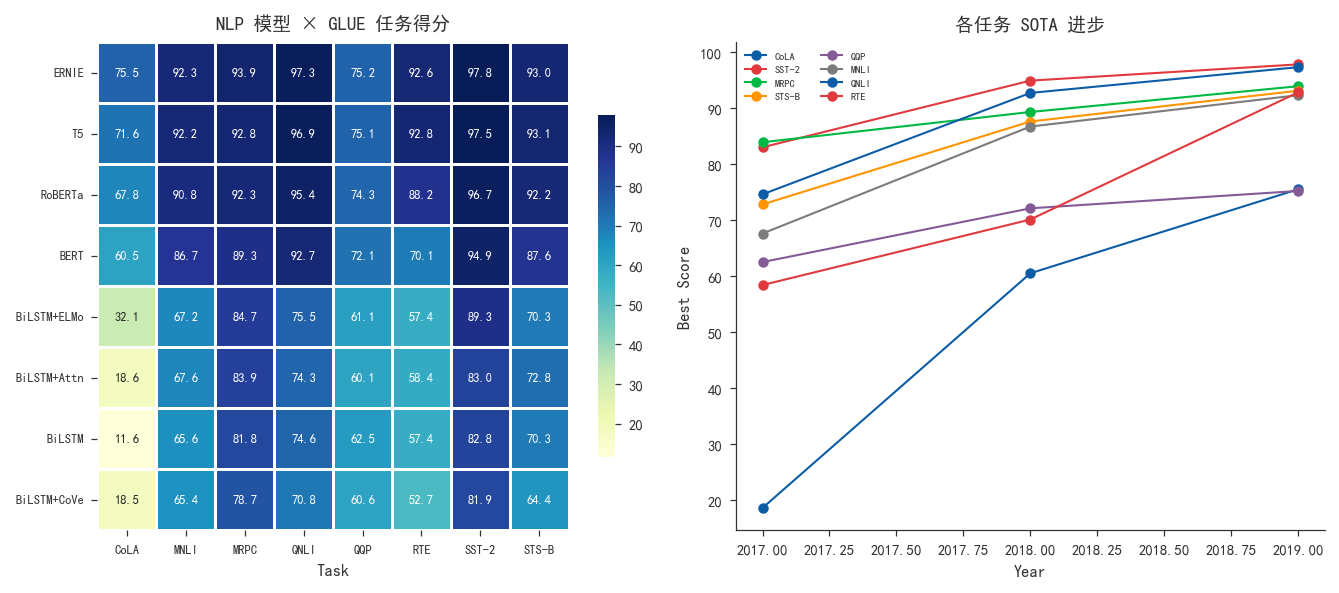

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# 左图：Model × Task 热力图
glue_pivot = glue.pivot_table(index='Model', columns='Task', values='Score')
# 按平均分排序
glue_pivot = glue_pivot.loc[glue_pivot.mean(axis=1).sort_values(ascending=False).index]
sns.heatmap(glue_pivot, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=0.5, linecolor='white',
            ax=axes[0], cbar_kws={'shrink': 0.7}, annot_kws={'fontsize': 6})
axes[0].set_title('NLP 模型 × GLUE 任务得分'); axes[0].set_ylabel('')
axes[0].tick_params(labelsize=6)

# 右图：按年份看模型进步 — 各任务的最高分
best_by_year = glue.groupby(['Year','Task'])['Score'].max().reset_index()
tasks = glue['Task'].unique()
for i, task in enumerate(tasks):
    sub = best_by_year[best_by_year['Task']==task]
    axes[1].plot(sub['Year'], sub['Score'], 'o-', color=C[i%len(C)], markersize=4, linewidth=1, label=task)
axes[1].set_xlabel('Year'); axes[1].set_ylabel('Best Score')
axes[1].set_title('各任务 SOTA 进步'); axes[1].legend(frameon=False, fontsize=5, ncol=2)

plt.tight_layout(); plt.show()

---
## 22. Brain_networks — 脑网络连接

脑网络节点间的信号测量值。数据维度较多，看一下结构。

923 行 x 63 列


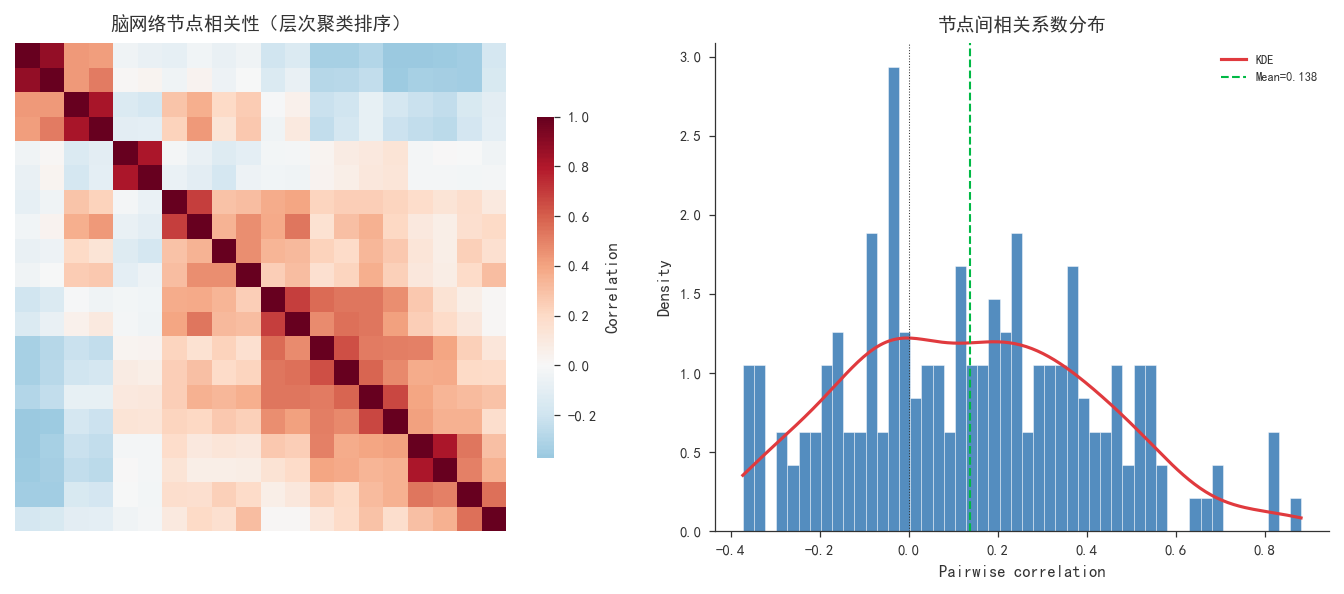

In [28]:
brain = pd.read_csv(DATA / 'brain_networks.csv')
print(f'{brain.shape[0]} 行 x {brain.shape[1]} 列')

# 提取数值矩阵（跳过前3行的元数据）
brain_numeric = brain.iloc[2:].apply(pd.to_numeric, errors='coerce').dropna()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# 左图：节点间相关性热力图（聚类排序）
from scipy.cluster.hierarchy import linkage, dendrogram
corr_mat = brain_numeric.iloc[:, 1:21].corr()  # 取前20列避免太大
Z = linkage(corr_mat, method='ward')
dn = dendrogram(Z, no_plot=True)
order = dn['leaves']
corr_ordered = corr_mat.iloc[order, order]

sns.heatmap(corr_ordered, cmap='RdBu_r', center=0, ax=axes[0],
            xticklabels=False, yticklabels=False,
            cbar_kws={'shrink': 0.7, 'label': 'Correlation'})
axes[0].set_title('脑网络节点相关性（层次聚类排序）')

# 右图：网络连接强度分布
upper_tri = corr_mat.where(np.triu(np.ones_like(corr_mat, dtype=bool), k=1))
corr_values = upper_tri.stack().values

axes[1].hist(corr_values, bins=50, color=C[0], edgecolor='white', linewidth=0.3, alpha=0.7, density=True)
# 叠加 KDE
from scipy.stats import gaussian_kde
kde = gaussian_kde(corr_values)
x_range = np.linspace(corr_values.min(), corr_values.max(), 200)
axes[1].plot(x_range, kde(x_range), color=C[1], linewidth=1.5, label='KDE')
axes[1].axvline(0, color='#333', linewidth=0.5, linestyle=':')
axes[1].axvline(corr_values.mean(), color=C[2], linewidth=1, linestyle='--',
                label=f'Mean={corr_values.mean():.3f}')
axes[1].set_xlabel('Pairwise correlation'); axes[1].set_ylabel('Density')
axes[1].set_title('节点间相关系数分布'); axes[1].legend(frameon=False, fontsize=6)

plt.tight_layout(); plt.show()

---
## 23. 彩蛋 — seaborn 作者的狗

仓库 `png/` 文件夹里藏了 6 张照片。Jupyter 可以直接内嵌显示图片。

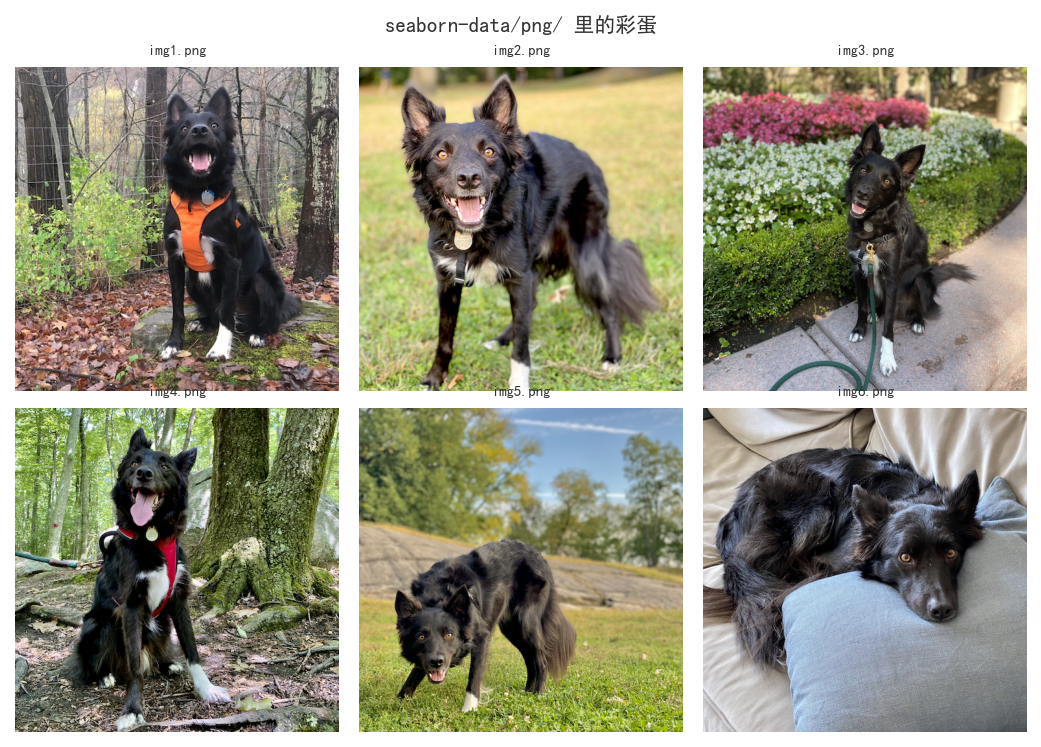

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(7, 5))
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(DATA / 'png' / f'img{i+1}.png')
    ax.imshow(img); ax.set_title(f'img{i+1}.png', fontsize=7); ax.axis('off')
fig.suptitle('seaborn-data/png/ 里的彩蛋', fontsize=10, fontweight='bold')
plt.tight_layout(); plt.show()

---
## 小结

seaborn-data 仓库包含 22 个数据集，覆盖了：
- **经典统计**：Anscombe（可视化的重要性）、Iris、Tips
- **生物/医学**：Penguins、fMRI、Exercise
- **社会/经济**：Titanic、Car_crashes、Taxis、Healthexp
- **时间序列**：Flights、Dowjones、Seaice
- **实验心理**：Attention、Anagrams、Dots、Geyser
- **科技**：Planets、Diamonds、MPG、Glue、Brain_networks

Jupyter 用下来比较方便的几点：
- **表格自动渲染** — DataFrame 直接显示 HTML 表格
- **图表内嵌显示** — 图直接出现在代码下方
- **单元格独立运行** — 改参数只需重跑那一格
- **变量常驻内存** — 数据加载一次，后面所有格子都能用
- **Markdown 混排** — 代码间穿插文字，像写笔记